# Information
$Writer:{\;}Junhyuck{\;}Woo
\\ Std. ID: 20145337
\\Project:{\;}K-means{\;}clustering{\;}on{\;}the{\;}spatial{\;}domain$

# import library

In [1]:
from collections import Counter
from collections import OrderedDict
import matplotlib.pyplot as plt
import statistics
import numpy as np
import random as rd

# Global parameter

In [2]:
size_row = 100       # height of the image
size_col = 100         # width of the image

# Function: normalize the values of the input data to be [0, 1]

In [3]:
def normalize(data):

    data_normalized = (data - np.min(data)) / (np.max(data) - np.min(data))

    return(data_normalized)

# Function: Distance between two vectors x and y

In [4]:
def distance(x, y):

    d = (x - y) * (x - y)
    s = np.sum(d)
    r = np.sqrt(s)

    return(s)

# Function: L2 norm

In [5]:
def l2_norm(x, y):
    d = (x - y) * (x - y)
    s = np.sum(d)
    r = np.sqrt(s)
    return(r)

# Function: L1 norm

In [6]:
def l1_norm(x,y):
    d = np.absolute(x-y)
    s = np.sum(d)
    return(s)

# Function: Centroid Combination

In [7]:
def centroid_combination(centroid, centroid_label):
    result = np.zeros((size_row, size_col, 2), dtype=float)
    for i in range(size_row):
        for j in range(size_col):
            result[i,j,:] = centroid[:, centroid_label[i,j]]
            
    return(normalize(result))

# Function: Visualizer

In [8]:
def visualizer(data, data_label):
    f1 = plt.figure(1)
    
    plt.title(data_label)
    plt.imshow(data, interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
        
    plt.show()

# Function: Initialize Centroid Label

In [9]:
def initialize_centroid_label(row, col, k):
    centroid_label = np.empty(row*col, dtype=int)
    
    # clustering
    for i in range(row*col):
        label = rd.randint(1, k) - 1
        centroid_label[i] = label
    
    return(centroid_label.reshape((row, col)))

# Function: Calculate Centroid (Average)

In [10]:
def calculate_average_centroid(row, col, k, train_data, centroid_label):
    
    centroid = np.zeros((2, k), dtype=float)
    count = np.zeros(k,dtype=int)
    
    # Create centroid image
    for i in range(row):
        for j in range(col):
            index = centroid_label[i,j]
            centroid[:,index] += train_data[i,j,:]
            count[index] += 1
    
    for i in range(k):
        if (count[i] != 0):
            centroid[:, i] /= count[i]

    return(centroid)

# Function: Calculate Centroid (Median)

In [11]:
def calculate_median_centroid(row, col, k, train_data, centroid_label):
    x_buf = np.zeros((k, row*col), dtype=float)
    y_buf = np.zeros((k, row*col), dtype=float)
    centroid = np.zeros((2, k), dtype=float)
    count = np.zeros(k, dtype=int)
    
    for i in range(row):
        for j in range(col):
            index = centroid_label[i,j]
            x_buf[index, count[index]]= train_data[i,j,0]
            y_buf[index, count[index]]= train_data[i,j,1]
            count[index]+=1
            
    for i in range(k):
        if count[i]==0:
            centroid[:,i] = np.array([0, 0])
            continue
    
        x_centroid = x_buf[i, 0:count[i]]
        y_centroid = y_buf[i, 0:count[i]]
        

        x_centroid = np.sort(x_centroid)
        y_centroid = np.sort(y_centroid)
        x = x_centroid[int(count[i]/2)]
        y = y_centroid[int(count[i]/2)]
        centroid[:,i] = np.array([x, y])
        
    return(centroid)

# Function: Clustering Data

In [12]:
def clustering(row, col, k_num, train_data, centroid, mode):
    cluster_label = np.zeros((size_row, size_col), dtype=int)
    dist = np.zeros(k_num, dtype=float)
    
    for i in range(size_row):
        for j in range(size_col):
            for k in range(k_num):
                if mode==1:
                    dist[k] = l1_norm(train_data[i,j,:], centroid[:,k])
                if mode==2:
                    dist[k] = l2_norm(train_data[i,j,:], centroid[:,k])
            cluster_label[i,j] = np.argmin(dist)
            
    return(cluster_label)

# Function: Energy
$\frac{1}{n} \sum_{x \in \Omega} \| f(x) - m_c \|^2
\\ where{\;}{k_i}{\;}denotes{\;}the{\;}category{\;}of{\;}{x_i},{\;}and{\;}c_{k_i}{\;}denotes{\;}the{\;}centroid{\;}of{\;}category{\;}{x_i}$

In [13]:
def calculate_energy(row, col, train_data, centroid, centroid_label, mode):
    energy = 0
    
    for i in range(row):
        for j in range(col):
            if mode==1:
                energy += l1_norm(train_data[i,j,:], centroid[:,centroid_label[i,j]])
            if mode==2:
                energy += l2_norm(train_data[i,j,:], centroid[:,centroid_label[i,j]])

    return(energy/(row*col))

# Function: K Means Algorithms

In [14]:
def k_means(row, col, k, mode):
    train_data = np.zeros((row, col, 2), dtype='f')
    for i in range(row):
        for j in range(col):
            train_data[i][j][0] = j
            train_data[j][i][1] = j
    
    energy = []
    train_accuracy = []
    
    previous_label = np.zeros((row, col), dtype=int)
    centroid_label = initialize_centroid_label(row, col, k)

    while (~np.all(previous_label == centroid_label)):
        if mode==1:
            centroid = calculate_median_centroid(row, col, k, train_data, centroid_label)
        if mode==2:
            centroid = calculate_average_centroid(row, col, k, train_data, centroid_label)
        
        # check traaining energy
        energy.append(calculate_energy(row, col, train_data, centroid, centroid_label, mode))
        previous_label = centroid_label
        centroid_label = clustering(row, col, k, train_data, centroid, mode)

    # Visualize K centroid images for each category.
    visualizer(centroid_label,"")
        
    # Plot the training energy per optimization iteration.
    plt.plot(energy, label='Energy')
    plt.legend(loc='upper right')
    plt.show()

# k=3 L1-Norm

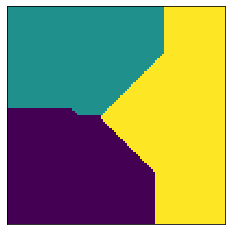

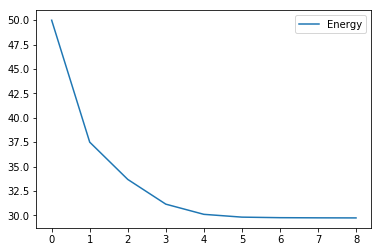

In [15]:
k_means(size_row, size_col, 3, 1)

# K = 3 L2-norm

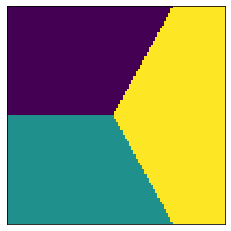

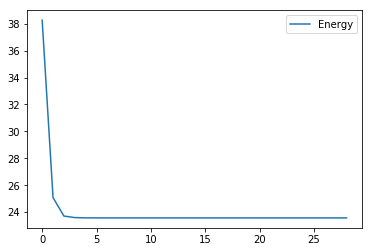

In [16]:
k_means(size_row, size_col, 3, 2)

# K = 5 L1-norm

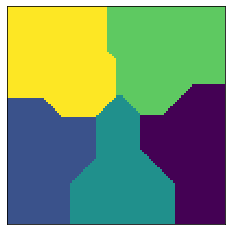

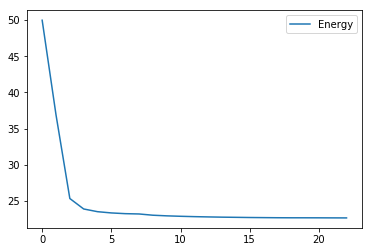

In [19]:
k_means(size_row, size_col, 5, 1)

# K=5 L2-norm

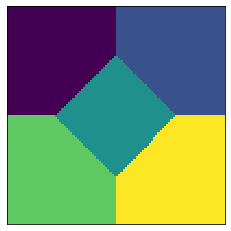

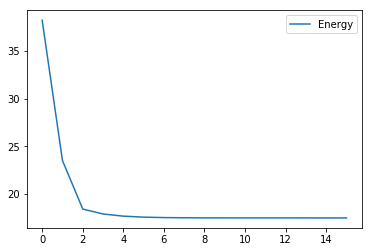

In [20]:
k_means(size_row, size_col, 5, 2)

# K = 9 L1-norm

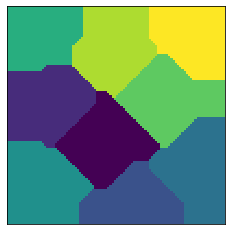

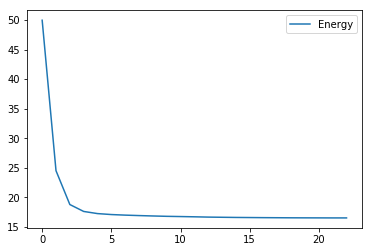

In [21]:
k_means(size_row, size_col, 9, 1)

# k=9 L2-norm

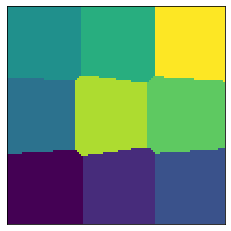

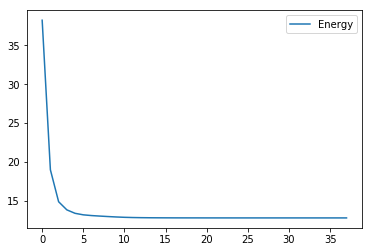

In [22]:
k_means(size_row, size_col, 9, 2)

# K = 15 L1-norm

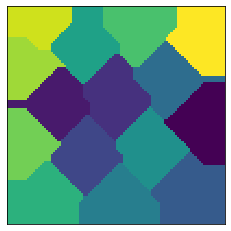

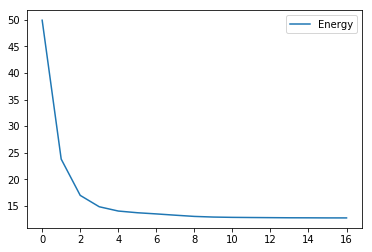

In [23]:
k_means(size_row, size_col, 15, 1)

# K=15 L2-norm

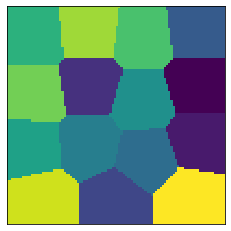

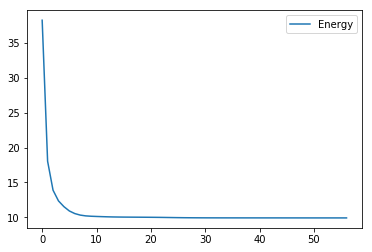

In [24]:
k_means(size_row, size_col, 15, 2)